In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


```
python -i  runRandTileTraining.py
```

if pick 10k tiles combo then takes around 3.5 hrs 

3000 tiles combo takes about 2 hrs


In [4]:
df = pd.read_csv("output/tile_combo_metric_area.csv",index_col=0)

In [5]:
df.head()

objid                                            T prime  Total Votes  \
0      1  [3301 2707 3291 2163  308 3265 2563 3262  185 ...          330   
1      1  [3112 3263   80 3178 1899 2600 3141  402 2043 ...          615   
2      1  [2299 3538 2163 1318 3291 2462 3390 1671  180 ...          576   
3      1  [2043 3141 2563 2134 2482 1835 1671 1318 3112 ...          416   
4      1  [ 401  180 2134 1558 3396 3301   80 2462 2554 ...          213   

   Average Votes  Total gamma value  Average gamma value    Total area  \
0      18.333333                  0                    0   4937.730507   
1      19.218750                  0                    0   9781.725465   
2      21.333333                  0                    0  28012.544110   
3      20.800000                  0                    0    934.619418   
4      17.750000                  0                    0    396.312214   

   Average area       pTprime  Precision    Recall  
0    274.318362  8.115292e-10   0.876060  0.850978  
1    305.678921  2.089219e-10   0.895784  1.000000  
2   1037.501634  4.440012e-10   0.192433  0.905442  
3     46.730971  8.115292e-10   0.190255  0.034236  
4     33.026018  3.818599e-10   0.300040  0.020974

### Compare subset results with individual worker PR 

In [6]:
mega_wlst=[]
mega_plst=[]
mega_rlst=[]
mega_objid=[]
for objid in tqdm(object_lst):
    wlst,plst,rlst = compute_worker_PR_obj(objid,return_worker_id=True)
    mega_objid.extend(objid*np.ones_like(wlst))
    mega_wlst.extend(wlst)
    mega_plst.extend(plst)
    mega_rlst.extend(rlst)

In [7]:
workerPR = pd.DataFrame(zip(mega_objid,mega_wlst,mega_plst,mega_rlst),columns=["objid","worker_id","Precision","Recall"])

In [8]:
for obj in list(set(workerPR.objid)):
    wR = workerPR[workerPR["objid"]==objid].sort(columns=["Recall"])["Recall"]
    rR =  df[df["objid"]==objid].sort(columns=["Recall"])["Recall"]
    list3 = [item1 for w,r in zip(wR,rR) if r>w]

In [9]:
Ppercentage=[]
Rpercentage=[]
for objid in list(set(workerPR.objid)):
    wR = workerPR[workerPR["objid"]==objid].sort(columns=["Recall"])["Recall"]
    rR =  df[df["objid"]==objid].sort(columns=["Recall"])["Recall"]
    Rcount= len([r for r in rR if r>max(wR)])
    Rpercentage.append(Rcount/float(len(rR))*100)
    wP = workerPR[workerPR["objid"]==objid].sort(columns=["Precision"])["Precision"]
    rP =  df[df["objid"]==objid].sort(columns=["Precision"])["Precision"]
    Pcount= len([r for r in rP if r>max(wP)])
    Ppercentage.append(Pcount/float(len(rP))*100)

In [10]:
print mean(Ppercentage)
print mean(Rpercentage)

14.2758865248
2.55531914894


In [11]:
workerPR[workerPR["objid"]==5].sort(columns=["Recall","Precision"],ascending=False).head()

objid  worker_id  Precision    Recall
178      5        238   0.937722  0.950324
155      5        146   0.937226  0.939745
179      5        240   0.944078  0.933686
170      5        199   0.858543  0.927441
151      5        133   0.893055  0.924260

In [20]:
df.sort(columns=["Recall","Precision"],ascending=False).head()

objid                                            T prime  Total Votes  \
14578      5  [1574 1823  954 3198 1702 2890 3103 1626 1604 ...         1282   
12412      5  [ 954 2711 1781 3048 2880 1394 2992 2961 1877 ...         1333   
13090      5  [1794 3179 2824 2992 2961 1432 1867 3198 2890 ...         1138   
12081      5  [2946 2824 2394 1794 1557 1823 2711 2890 2992 ...          925   
13385      5  [3182 2711 2487 1001 2573 1823 1394 2992 3242 ...         1210   

       Average Votes  Total gamma value  Average gamma value   Total area  \
14578      35.611111          34.209592             0.950266  5504.311643   
12412      36.027027          35.205228             0.951493  5511.561788   
13090      35.562500          30.298149             0.946817  5219.164445   
12081      35.576923          24.281738             0.933913  5262.286656   
13385      35.588235          32.223851             0.947760  5457.648058   

       Average area  Precision  Recall  
14578    152.897546   0.996564       1  
12412    148.961129   0.996484       1  
13090    163.098889   0.996474       1  
12081    202.395641   0.996450       1  
13385    160.519061   0.996445       1

In [25]:
workerPR[workerPR["objid"]==12].sort(columns=["Recall","Precision"],ascending=False).head()

objid  worker_id  Precision    Recall
456     12          2   1.000000  1.000000
420     12          6   0.754620  0.997418
429     12        133   0.834533  0.989076
453     12        233   0.866979  0.981572
425     12         54   0.926036  0.981140

In [24]:
df[df["objid"]==12].sort(columns=["Recall","Precision"],ascending=False).head()

objid                                            T prime  Total Votes  \
35332     12  [1471 2258 1375 3287 2932 2729 3000 3237 1341 ...          881   
33163     12  [2777 2809 3287 3052 2942 1212 1016 2840 2877 ...         1202   
34093     12  [3000 3237 3248 2942 3257 3106 2840  174  543 ...         1095   
35795     12  [1375 2901 3287 2932 2809 3185 2942 3257 1187 ...         1015   
34491     12  [1187 3000 2942 2729 2901  184 3185 1212 1876 ...          737   

       Average Votes  Total gamma value  Average gamma value   Total area  \
35332      38.304348          21.334367             0.927581  4305.369444   
33163      37.562500          28.495182             0.890474  6494.298063   
34093      36.500000          25.524699             0.850823  6441.237484   
35795      37.592593          23.529049             0.871446  6391.852677   
34491      36.850000          17.355011             0.867751  4276.053831   

       Average area  Precision  Recall  
35332    187.189976   0.994579       1  
33163    202.946814   0.990707       1  
34093    214.707916   0.989595       1  
35795    236.735284   0.989493       1  
34491    213.802692   0.989081       1

# Correlation between variables

In [12]:
df = df[df["Total gamma value"]!=0]

In [13]:
df["N tiles"] = df["T prime"].apply(lambda x:len(x))

In [14]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

Total Votes  Average Votes  Total gamma value  \
Total Votes             1.000000       0.430161           0.963644   
Average Votes           0.430161       1.000000           0.365509   
Total gamma value       0.963644       0.365509           1.000000   
Average gamma value     0.351308       0.838335           0.405739   
Total area              0.308626      -0.200948           0.350402   
Average area           -0.069693      -0.147188          -0.055503   
pTprime                -0.351208      -0.552292          -0.290224   
Precision               0.353476       0.730186           0.305146   
Recall                  0.665830       0.174105           0.634076   
N tiles                 0.857602       0.011355           0.864060   

                     Average gamma value  Total area  Average area   pTprime  \
Total Votes                     0.351308    0.308626     -0.069693 -0.351208   
Average Votes                   0.838335   -0.200948     -0.147188 -0.552292   
Total gamma value               0.405739    0.350402     -0.055503 -0.290224   
Average gamma value             1.000000   -0.154358     -0.166572 -0.408713   
Total area                     -0.154358    1.000000      0.553916  0.022607   
Average area                   -0.166572    0.553916      1.000000  0.053782   
pTprime                        -0.408713    0.022607      0.053782  1.000000   
Precision                       0.598474   -0.338283     -0.230480 -0.437092   
Recall                          0.039065    0.496475      0.165609 -0.174756   
N tiles                         0.009135    0.512550     -0.000313 -0.102559   

                     Precision    Recall   N tiles  
Total Votes           0.353476  0.665830  0.857602  
Average Votes         0.730186  0.174105  0.011355  
Total gamma value     0.305146  0.634076  0.864060  
Average gamma value   0.598474  0.039065  0.009135  
Total area           -0.338283  0.496475  0.512550  
Average area         -0.230480  0.165609 -0.000313  
pTprime              -0.437092 -0.174756 -0.102559  
Precision             1.000000  0.233947  0.029946  
Recall                0.233947  1.000000  0.688909  
N tiles               0.029946  0.688909  1.000000

<matplotlib.colorbar.Colorbar instance at 0x1070c2710>

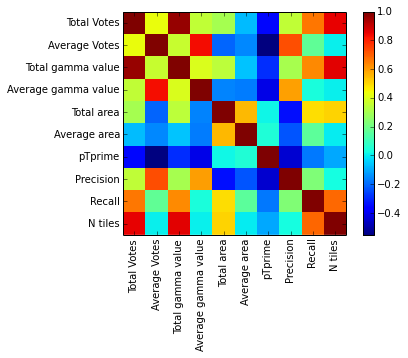

In [15]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,10)
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()

# Regression for ground truth PR

In [16]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area","pTprime"]
# x_attr=df.keys()[2:-2]
print x_attr
y_attr = ["Precision","Recall"]
print y_attr

['Average Votes', 'Average gamma value', 'Total area', 'Average area', 'pTprime']
['Precision', 'Recall']


In [17]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [18]:
msk = np.random.rand(len(df)) < 0.8
Xtrain = df[x_attr][msk].as_matrix()
Xtest = df[x_attr][~msk].as_matrix()
Ytrain = df[y_attr][msk].as_matrix()
Ytest = df[y_attr][~msk].as_matrix()

In [19]:
regr.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtest) - Ytest) ** 2))
print('R^2: %.2f' % regr.score(Xtest, Ytest))

('Coefficients: \n', array([[  2.72776145e-02,  -5.17603593e-02,  -1.56058263e-05,
         -3.10765461e-05,  -1.41584402e+09],
       [  2.35652879e-02,  -6.00242636e-01,   5.05946639e-05,
         -2.02466552e-04,  -2.04193684e+07]]))
Mean squared error: 0.05
R^2: 0.49


In [21]:
X = df[x_attr].as_matrix()
Y = df[y_attr].as_matrix()

In [22]:
regr.fit(X,Y)
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[  2.70029741e-02,  -4.21170281e-02,  -1.58187494e-05,
         -3.02420685e-05,  -1.42984298e+09],
       [  2.31077111e-02,  -5.81614653e-01,   4.96523558e-05,
         -1.82840412e-04,  -7.88152418e+07]]))


In [23]:
print np.mean(df["Precision"])
print np.mean(df["Recall"])

0.717713602393
0.511573837494


#### $\therefore$ Average gamma value more important in determining actual PR compared to average area or average votes of the selected tiles , results qualitatively agree with our lossy BB2Tile algorithm

### Regression on Precision and Recall Separately


In [51]:
def regression_results(x_attr,y_attr,PLOT=False):
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)
        plt.title("MSE=%.2f"% np.mean((regr.predict(Xtest) - Ytest) ** 2)+'; R^2=%.2f' % regr.score(Xtest, Ytest))
        plt.xlabel(x_attr[0],fontsize=13)
        plt.ylabel(y_attr[0],fontsize=13)

In [52]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area","pTprime"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr)

('Coefficients: \n', array([[  2.72398022e-02,  -5.27176686e-02,  -1.56253781e-05,
         -3.58649726e-05,  -1.42932801e+09]]))
Mean squared error: 0.05
R^2: 0.57


In [26]:
x_attr = ["Average Votes","Average gamma value","Total area", "Average area","pTprime"]
y_attr = ["Recall"]
regression_results(x_attr,y_attr)

('Coefficients: \n', array([[  2.31841321e-02,  -5.81273952e-01,   4.91489681e-05,
         -1.69408296e-04,  -6.49908933e+07]]))
Mean squared error: 0.06
R^2: 0.39


# Regression on single x variables separately

('Coefficients: \n', array([[ -3.12391567e+09]]))
Mean squared error: 0.09
R^2: 0.03


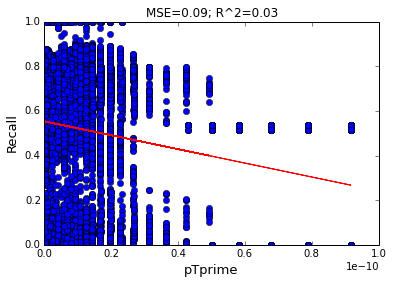

In [44]:
x_attr = ["pTprime"]
y_attr = ["Recall"]
regression_results(x_attr,y_attr,PLOT=True)

('Coefficients: \n', array([[ -8.67379909e+09]]))
Mean squared error: 0.09
R^2: 0.20


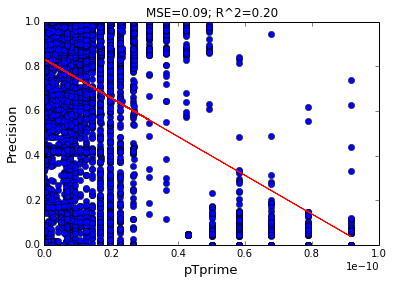

In [45]:
x_attr = ["pTprime"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

('Coefficients: \n', array([[ 0.02937746]]))
Mean squared error: 0.05
R^2: 0.52


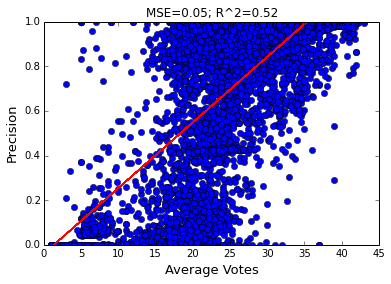

In [46]:
x_attr = ["Average Votes"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

('Coefficients: \n', array([[ 0.91251071]]))
Mean squared error: 0.07
R^2: 0.36


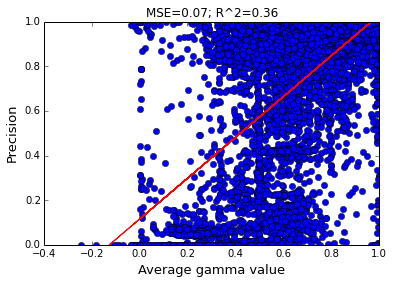

In [47]:
x_attr = ["Average gamma value"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,PLOT=True)

You can't really compare the fitting coefficients because the data attributes are unnormalized, so comparing votes to pTprime is like comparing apples to oranges. You need to somehow use normalized attributes scaled in the same way or just look at the R^2 results

# Normalized Regression 

In [55]:
from sklearn.preprocessing import StandardScaler
def regression_results(x_attr,y_attr,PLOT=False,normScale=False):
    regr = linear_model.LinearRegression()
    msk = np.random.rand(len(df)) < 0.8
    Xtrain = df[x_attr][msk].as_matrix()
    Xtest = df[x_attr][~msk].as_matrix()
    if normScale:
        Xtrain = StandardScaler().fit_transform(Xtrain)
        Xtest = StandardScaler().fit_transform(Xtest)
    
    Ytrain = df[y_attr][msk].as_matrix()
    Ytest = df[y_attr][~msk].as_matrix()
    regr.fit(Xtrain,Ytrain)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(Xtest) - Ytest) ** 2))
    print('R^2: %.2f' % regr.score(Xtest, Ytest))
    if PLOT:
        plt.plot(Xtest,Ytest,'o')
        plt.plot(Xtest,regr.predict(Xtest),'r-')
        plt.ylim(0,1)
        plt.title("MSE=%.2f"% np.mean((regr.predict(Xtest) - Ytest) ** 2)+'; R^2=%.2f' % regr.score(Xtest, Ytest))
        plt.xlabel(x_attr[0],fontsize=13)
        plt.ylabel(y_attr[0],fontsize=13)

In [140]:
x_attr = ["Average Votes","Average gamma value","Total area", "pTprime"]
y_attr = ["Precision"]
regression_results(x_attr,y_attr,normScale=True)

('Coefficients: \n', array([[ 0.22369824, -0.00735512, -0.06977175, -0.02425475]]))
Mean squared error: 0.05
R^2: 0.58


In [141]:
x_attr = ["Average Votes","Average gamma value","Total area","pTprime"]
y_attr = ["Recall"]
regression_results(x_attr,y_attr,normScale=True)

('Coefficients: \n', array([[ 0.18624749, -0.11832616,  0.17262693, -0.00264181]]))
Mean squared error: 0.06
R^2: 0.37


# Worker Qualities 

In [104]:
cd ..

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [105]:
Qj = pkl.load(open("Qj.pkl",'r'))

In [110]:
Qj_lst = []

In [111]:
for worker_id, Qjs in Qj.iteritems():
    #print worker_id,Qjs
    Qj_lst.extend(Qjs)

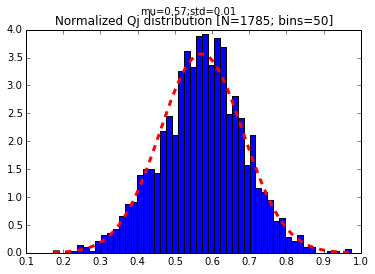

In [133]:

a = plt.hist(Qj_lst,bins=50,normed=True)
data = Qj_lst
avg = np.mean(data)
var = np.var(data)
plt.title("Normalized Qj distribution [N={}; bins=50]".format(len(Qj_lst)))
plt.suptitle("mu={0:.2f};std={1:.2f}".format(avg,var))
pdf_x = np.linspace(np.min(data),np.max(data),100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)
plt.plot(pdf_x,pdf_y,'--',color='red',linewidth=3)


In [97]:
bb_info[bb_info["worker_id"]==2]

object_id  worker_id                                             x_locs  \
183           9          2  [257, 353, 380, 383, 385, 309, 294, 284, 269, ...   
1891         12          2           [304, 307, 308, 381, 394, 402, 402, 310]   
1892         10          2  [393, 411, 440, 472, 520, 541, 539, 537, 537, ...   

                                                 y_locs  
183   [219, 191, 232, 252, 279, 288, 278, 269, 268, ...  
1891           [292, 311, 323, 439, 443, 440, 431, 301]  
1892  [237, 228, 224, 225, 238, 257, 270, 278, 285, ...

In [61]:
Qj_mean={}
for wid, qj in Qj.iteritems():
    Qj_mean[wid]=mean(qj)

In [62]:
top10workers=np.array(Qj.keys())[np.argsort(Qj_mean.values())[::-1][:10]]

In [134]:
worse10workers=np.array(Qj.keys())[np.argsort(Qj_mean.values())[:10]]

In [135]:
worse10workers

array([178,  18, 207, 100,  13, 129, 271, 242,  60, 245])

In [63]:
top10workers

array([  2,  24,  55,  42, 243, 108,  99,  51,  57, 203])

In [87]:
cd output/

[Errno 2] No such file or directory: 'output/'
/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [85]:
def visualize_bb_worker(worker_id,gtypes=['worker','self']):
    '''
    Plot BB for the object corresponding to the given object_id
    #Still need to implement COCO later...
    gtypes: list specifying the types of BB to be plotted (worker=all worker's annotation, 'self'=self BBG)
    '''
    img_info,object_tbl,bb_info,hit_info=load_info()
    ground_truth = pd.read_csv("../../../../data/object_ground_truth.csv")
    my_BBG  = pd.read_csv("../my_ground_truth.csv")
    filtered_bb_info=bb_info[bb_info["worker_id"]==worker_id]
    for object_id in list(filtered_bb_info.object_id):
        visualize_bb_objects(object_id,single=True,gtypes=gtypes,bb_info=filtered_bb_info)
#         plt.suptitle("Worker {}".format(worker_id))
    #plt.savefig("bb_worker_{0}_object_{1}.pdf".format(worker_id,object_id))

In [86]:
def visualize_bb_objects(object_id,img_bkgrnd=True,worker_id=-1,gtypes=['worker','self'],single=False,bb_info=""):
    '''
    Plot BB for the object corresponding to the given object_id
    #Still need to implement COCO later...
    gtypes: list specifying the types of BB to be plotted (worker=all worker's annotation, 'self'=self BBG)
    '''
    if not single:
        img_info,object_tbl,bb_info,hit_info=load_info()
    else:
        img_info,object_tbl,bb_info_bad,hit_info=load_info()
    plt.figure(figsize =(7,7))
    ground_truth = pd.read_csv("../../../../data/object_ground_truth.csv")
    my_BBG  = pd.read_csv("../my_ground_truth.csv")
    if img_bkgrnd:
        img_name = img_info[img_info.id==int(object_tbl[object_tbl.id==object_id]["image_id"])]["filename"].iloc[0]
        fname = "../../../web-app/app/static/"+img_name+".png"
        img=mpimg.imread(fname)
        width,height = get_size(fname)
        img_id = int(img_name.split('_')[-1])
        plt.imshow(img)
        plt.xlim(0,width)
        plt.ylim(height,0)
        plt.axis("off")   
    else:
        plt.gca().invert_yaxis()
    plt.title("Object {0} [{1}]".format(object_id,object_tbl[object_tbl.object_id==object_id]["name"].iloc[0]))
#         plt.fill_between(x_locs,y_locs,color='none',facecolor='#f442df', alpha=0.5)
    if 'worker' in gtypes:
        bb_objects = bb_info[bb_info["object_id"]==object_id]
        if worker_id!=-1:
            bb = bb_objects[bb_objects["worker_id"]==worker_id]
            xloc,yloc =  process_raw_locs([bb["x_locs"].iloc[0],bb["y_locs"].iloc[0]])    
        
            plt.plot(xloc,yloc,'-',color='cyan',linewidth=3)
            plt.fill_between(xloc,yloc,color='none',facecolor='#f442df', alpha=0.01)
        else:
            for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"]):
                xloc,yloc = process_raw_locs([x,y])
                if single:
                    plt.plot(xloc,yloc,'-',color='#f442df',linewidth=4)
                else:
                    plt.plot(xloc,yloc,'-',color='#f442df',linewidth=1)
                    plt.fill_between(xloc,yloc,color='none',facecolor='#f442df', alpha=0.01)
    if 'self' in gtypes:
        ground_truth_match = my_BBG[my_BBG.object_id==object_id]
        x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
        if single:
            plt.plot(x_locs,y_locs,'--',color='#0000ff',linewidth=2)
        else: 
            plt.plot(x_locs,y_locs,'-',color='#0000ff',linewidth=4)
    # elif gtype=='COCO':
    #     ground_truth_match = my_BBG[my_BBG.object_id==object_id]
    if not single:plt.savefig("bb_object_{}.pdf".format(object_id))

In [137]:
cd output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


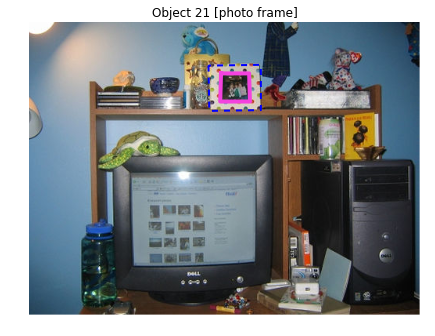

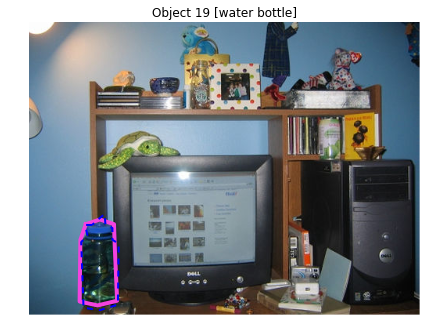

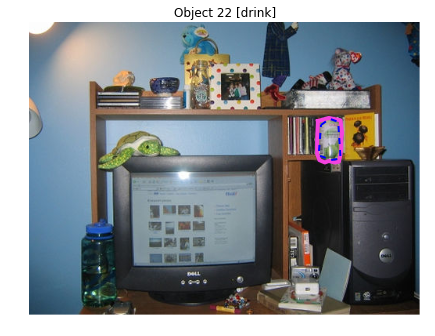

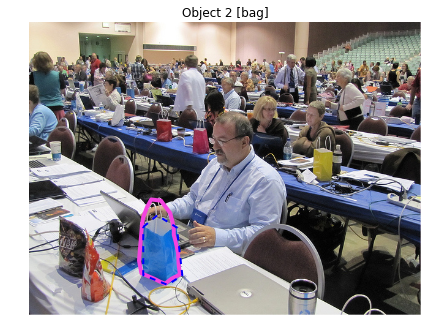

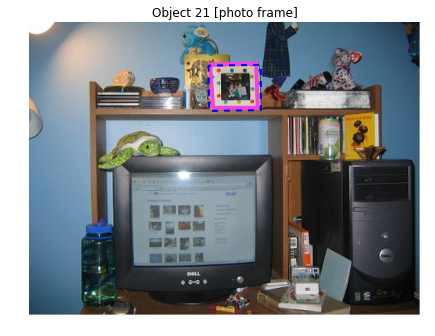

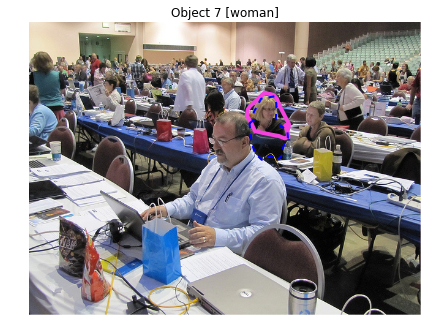

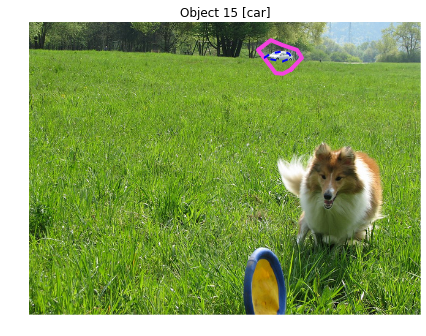

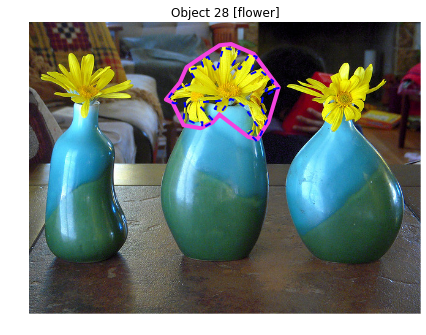

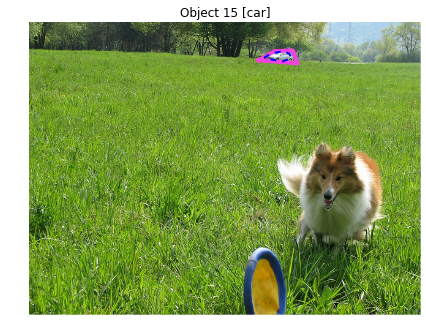

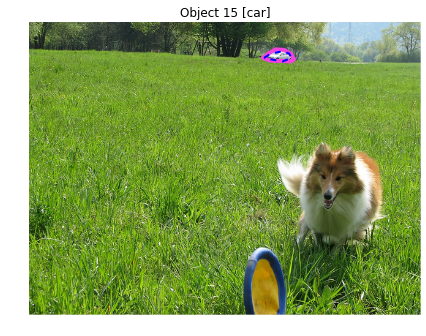

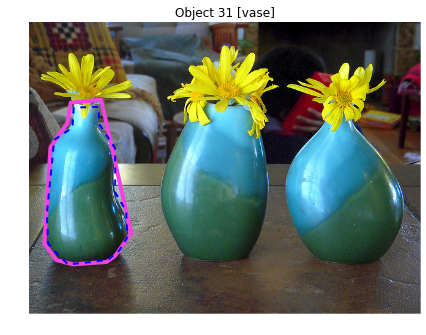

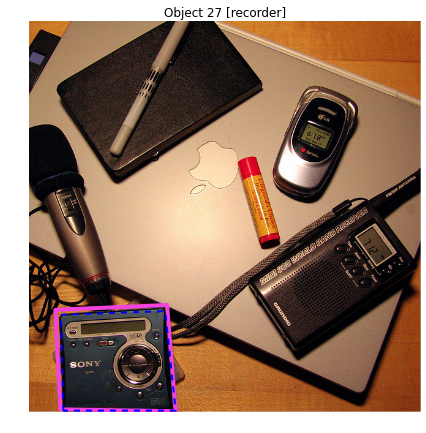

In [138]:
for wid in worse10workers: 
    visualize_bb_worker(wid)

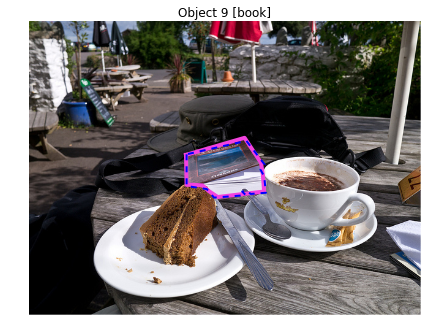

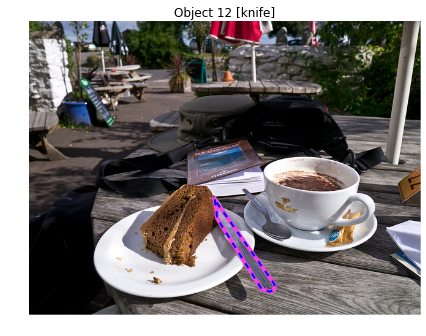

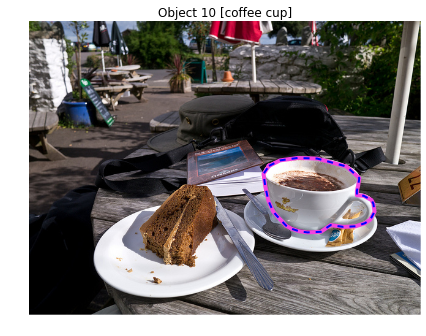

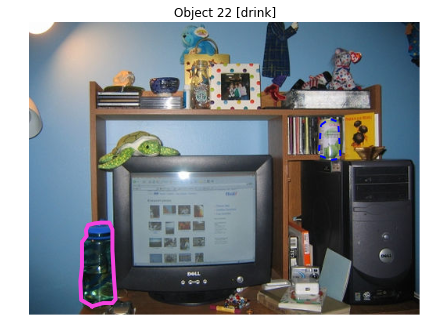

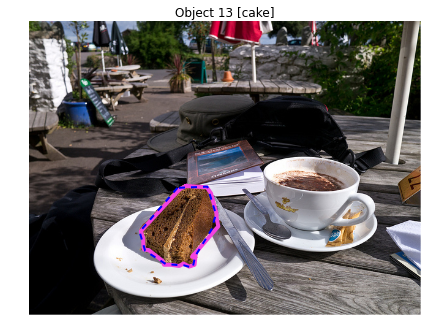

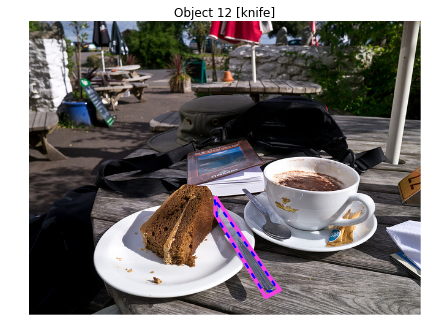

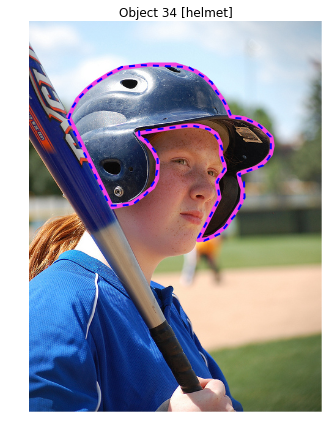

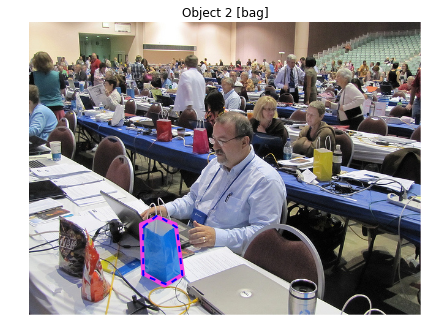

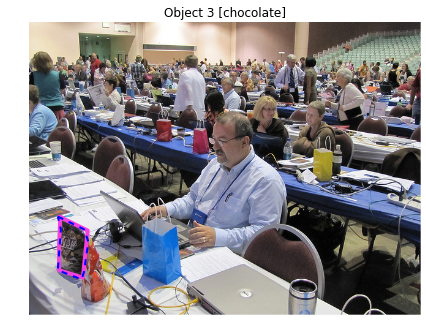

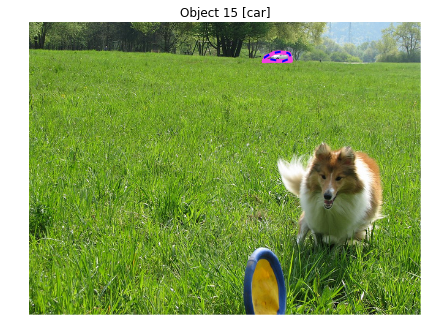

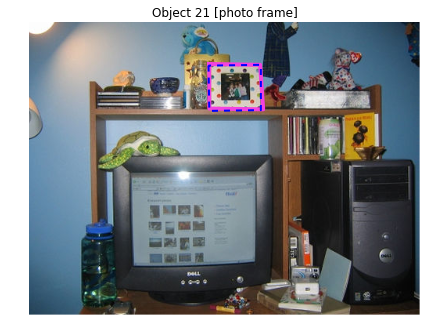

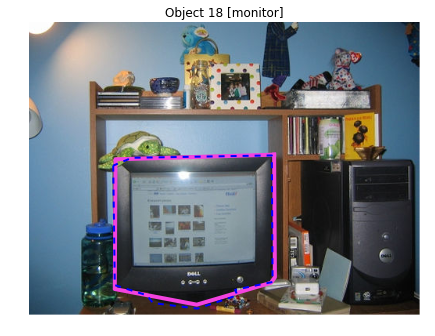

In [88]:
for wid in top10workers: 
    visualize_bb_worker(wid)